In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on August 23 2018
@author: ncaplar@princeton.edu
"""

'\nCreated on August 23 2018\n@author: ncaplar@princeton.edu\n'

In [2]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [3]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [49]:

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 18})
%config InlineBackend.rc = {}
%matplotlib inline

import numpy as np
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous
import os
import sys
from DELCgen import *


from scipy.stats import kurtosis

# AstroML code, pure power law

In [50]:
N=10000000
dt=1
factor=1
print('For normal distribution kurtosis is 0')
beta=1.0
x_Slope_1 = factor * generate_power_law(N, dt, beta)
print(kurtosis(x_Slope_1))
beta=2.0
x_Slope_2 = factor * generate_power_law(N, dt, beta)
print(kurtosis(x_Slope_2))
beta=3.0
x_Slope_3 = factor * generate_power_law(N, dt, beta)
print(kurtosis(x_Slope_3))

For normal distribution kurtosis is 0
0.00312015945213
-1.19686918736
-0.380218255301


(array([  802963.,   609320.,   673052.,  1272841.,  1890188.,  1886180.,
         1219580.,   528283.,   565109.,   552484.]),
 array([-292.64657755, -232.01290898, -171.37924041, -110.74557183,
         -50.11190326,   10.52176531,   71.15543388,  131.78910245,
         192.42277102,  253.0564396 ,  313.69010817]),
 <a list of 10 Patch objects>)

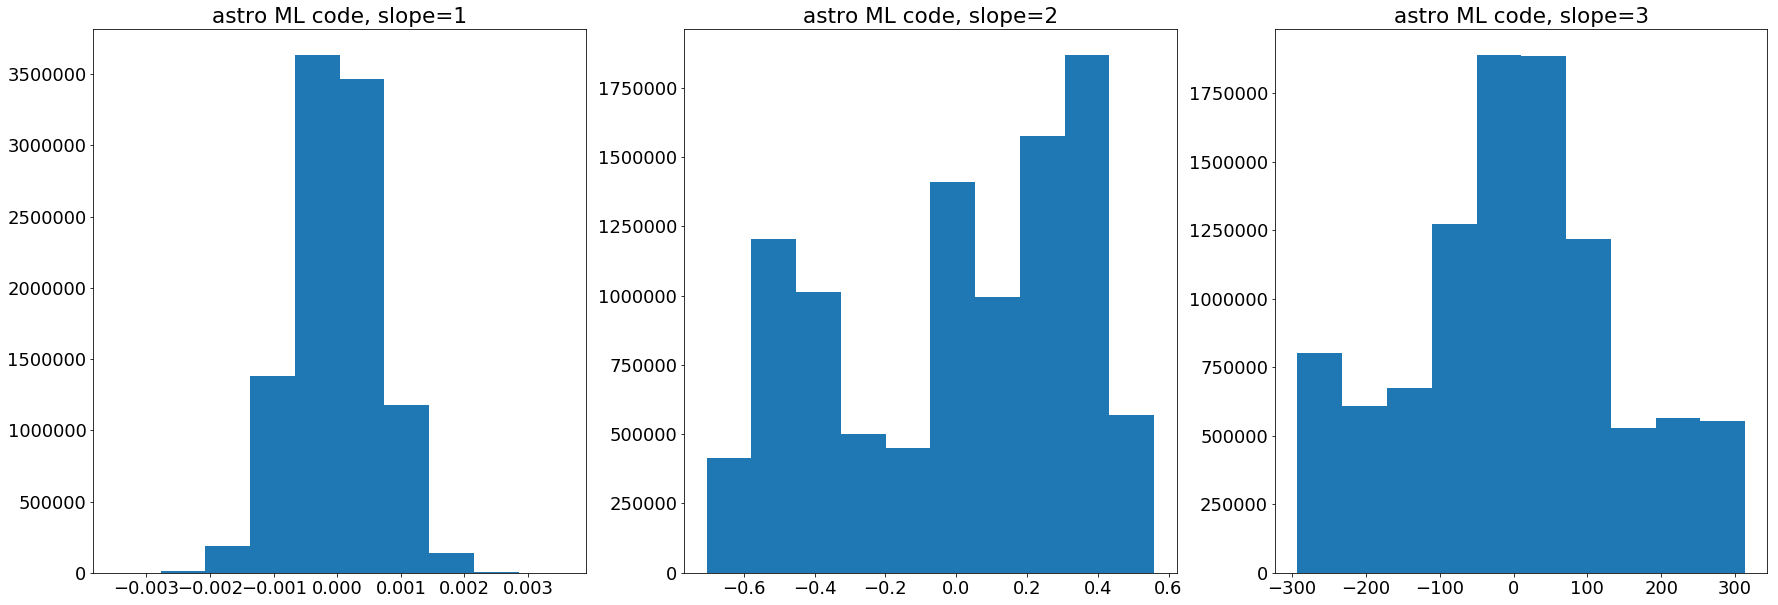

In [51]:
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.title('astro ML code, slope=1')
plt.hist(x_Slope_1)
plt.subplot(132)
plt.title('astro ML code, slope=2')
plt.hist(x_Slope_2)
plt.subplot(133)
plt.title('astro ML code, slope=3')
plt.hist(x_Slope_3)

# DELCGen, pure power law

In [52]:
print('For normal distribution kurtosis is 0')
beta=1.0
delc =Simulate_TK_Lightcurve(BendingPL, (1,1.0/1000000,0,beta,0), RedNoiseL=1,aliasTbin=1,tbin = 1,length=5000)
x_Slope_1 = delc.flux
print(kurtosis(x_Slope_1))
beta=2.0
delc =Simulate_TK_Lightcurve(BendingPL, (1,1.0/1000000,0,beta,0), RedNoiseL=1,aliasTbin=1,tbin = 1,length=5000)
x_Slope_2 = delc.flux
print(kurtosis(x_Slope_2))
beta=3.0
delc =Simulate_TK_Lightcurve(BendingPL, (1,1.0/1000000,0,beta,0), RedNoiseL=1,aliasTbin=1,tbin = 1,length=5000)
x_Slope_3 = delc.flux
print(kurtosis(x_Slope_3))

For normal distribution kurtosis is 0
0.112812946571
-0.466761091036
-0.770347019323


(array([ 788.,  820.,  769.,  764.,  377.,  265.,  176.,  291.,  290.,  461.]),
 array([-1.33806567, -0.99509894, -0.65213222, -0.30916549,  0.03380124,
         0.37676796,  0.71973469,  1.06270142,  1.40566814,  1.74863487,
         2.0916016 ]),
 <a list of 10 Patch objects>)

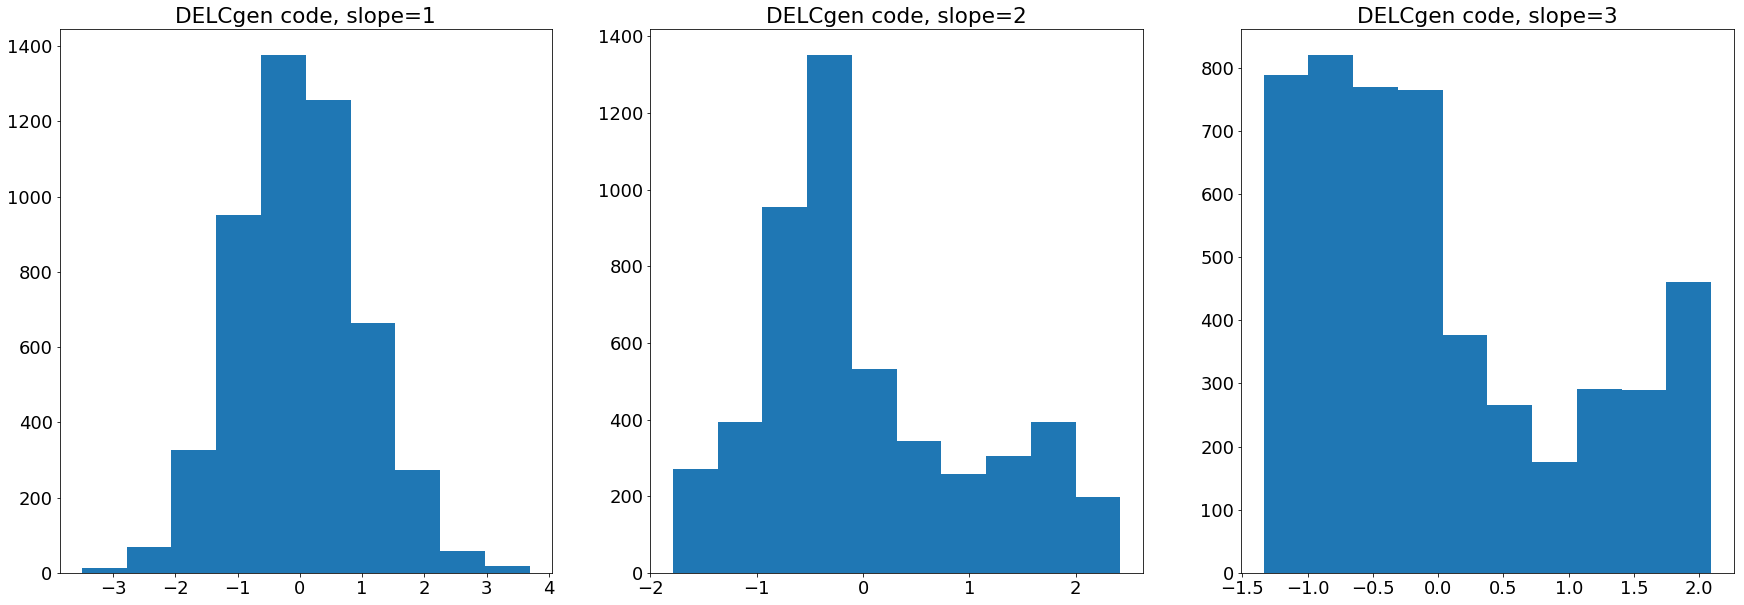

In [53]:
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.title('DELCgen code, slope=1')
plt.hist(x_Slope_1)
plt.subplot(132)
plt.title('DELCgen code, slope=2')
plt.hist(x_Slope_2)
plt.subplot(133)
plt.title('DELCgen code, slope=3')
plt.hist(x_Slope_3)

# DELCGen, broken power law

In [40]:
print('For normal distribution kurtosis is 0')
beta=1.0
delc =Simulate_TK_Lightcurve(BendingPL, (1,1.0/1000,0,beta,0), RedNoiseL=1,aliasTbin=1,tbin = 1,length=50000)
x_Slope_1 = delc.flux
print(kurtosis(x_Slope_1))
beta=2.0
delc =Simulate_TK_Lightcurve(BendingPL, (1,1.0/1000,0,beta,0), RedNoiseL=1,aliasTbin=1,tbin = 1,length=50000)
x_Slope_2 = delc.flux
print(kurtosis(x_Slope_2))
beta=3.0
delc =Simulate_TK_Lightcurve(BendingPL, (1,1.0/1000,0,beta,0), RedNoiseL=1,aliasTbin=1,tbin = 1,length=50000)
x_Slope_3 = delc.flux
print(kurtosis(x_Slope_3))

For normal distribution kurtosis is 0
-0.00606254611632
-0.00890179435138
-0.124477893697


(array([   345.,   2907.,   6401.,  11601.,  11899.,   9738.,   4888.,
          1647.,    461.,    114.]),
 array([-2.82982407, -2.18055042, -1.53127677, -0.88200312, -0.23272947,
         0.41654418,  1.06581783,  1.71509148,  2.36436512,  3.01363877,
         3.66291242]),
 <a list of 10 Patch objects>)

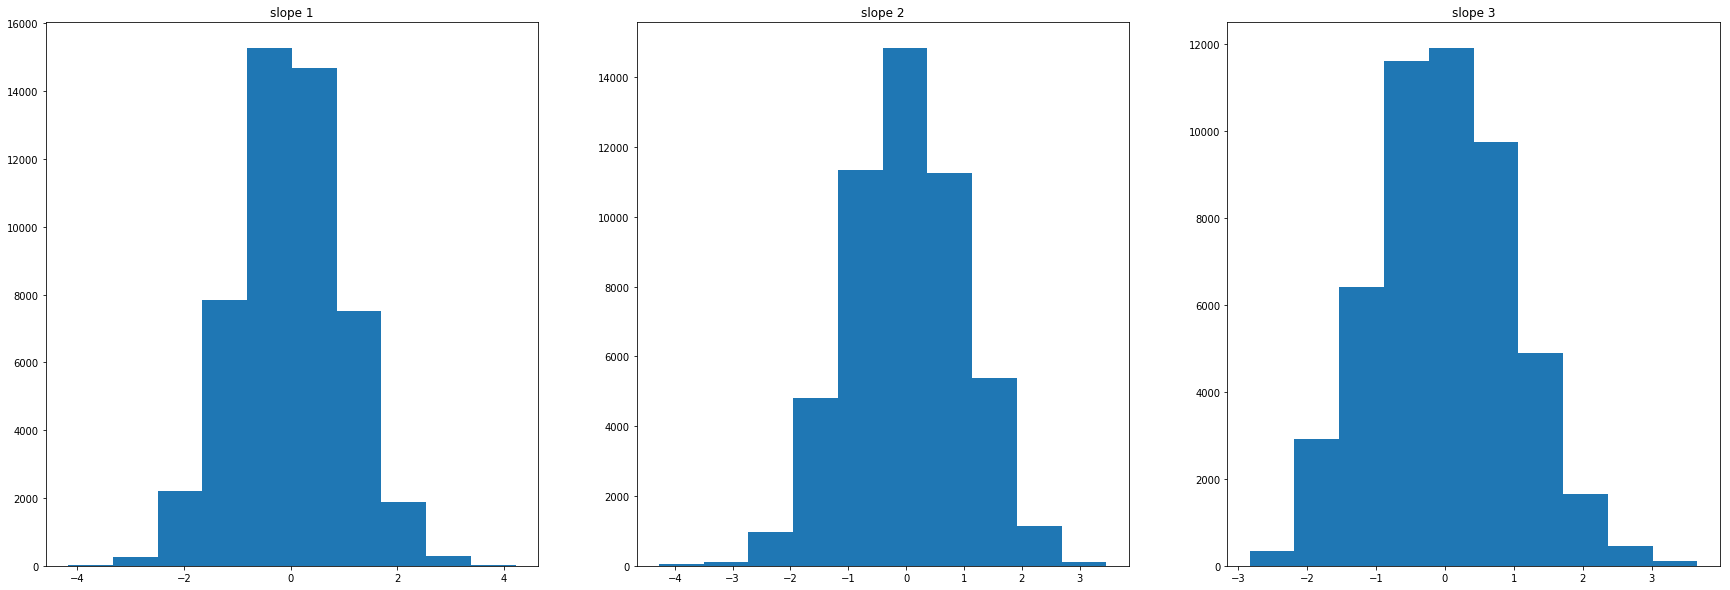

In [41]:
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.title('slope 1')
plt.hist(x_Slope_1)
plt.subplot(132)
plt.title('slope 2')
plt.hist(x_Slope_2)
plt.subplot(133)
plt.title('slope 3')
plt.hist(x_Slope_3)